In [1]:
import sys
sys.path.append('..')
from utils import *
sys.path.append('../attacks/')
from fgsm import *
sys.path.append('../models/')
from torch import nn,norm
import torch
from torchvision import transforms, datasets
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd
import numpy as np

In [2]:
imgs = datasets.ImageFolder('/home/hancy/dataset/imagenet3000/',transform=transforms.ToTensor())

In [3]:
wm_origin = cv2.imread('../img/logo.jpg')
wm_origin = cv2.cvtColor(wm_origin,cv2.COLOR_BGR2RGB)
wm_origin = transforms.ToTensor()(wm_origin).cuda()

In [4]:
from alexnet import *
model = alexnet_IN().cuda()

In [5]:
img = imgs[10][0].cuda()

In [6]:
label = torch.tensor([imgs[10][1]]).cuda()

In [7]:
block_size = 8
alpha = 0.1
beta = 10/255
eps = 5/255
steps = 10

In [8]:
l1 = 0.01
l2 = 0.01
s_a = 0.0005
s_b = 0.0001
N = 20
beta_max = 20/255

In [9]:
img = addborder(img)
wm = transforms.Resize(img.size()[-2:])(wm_origin).cuda()

In [12]:
from ifgsm import *
wmed_res, wm_extracted, alpha, beta = ifgsm_wm_opti(img,label,wm,model,alpha,beta,block_size,steps,eps,N,l1,l2,s_a,s_b,beta_max)

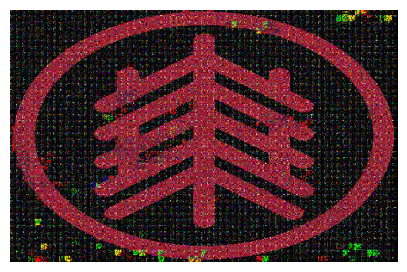

In [15]:
pltshow(wm_extracted)

In [17]:
res = model(wmed_res.unsqueeze(0)).argmax().item()

In [18]:
res

6